After high pass filtering, we notice that there are high energy frequency components in our signal at 50-60 Hz and harmonics of these values. We visualize this below, and show spectrograms of several channels showing that this noise is localized in the frequency domain around these values.

#### Loading the data...

In [1]:
%matplotlib inline
import cPickle as pkl
base = '../../data/'
path = 'bids_raw/sub-0001/ses-01/eeg/'
file_name = 'sub-0001_ses-01.pkl'
full_path = base + path + file_name
with open(full_path, 'rb') as f:
    D = pkl.load(f)

#### Visualizing the data...

In [2]:
import numpy as np
import sys
sys.path.append('..')
from panda.methods import viz as viz
from panda import config
p_global = config.params['p_global']
eog_chans = np.array(p_global['eog_chans']) - 1
eeg_chans = np.setdiff1d(np.arange(128), eog_chans)
p_global.update({'eog_chans': eog_chans,
                'eeg_chans': eeg_chans})

p_global['plotting']['notebook'] = True

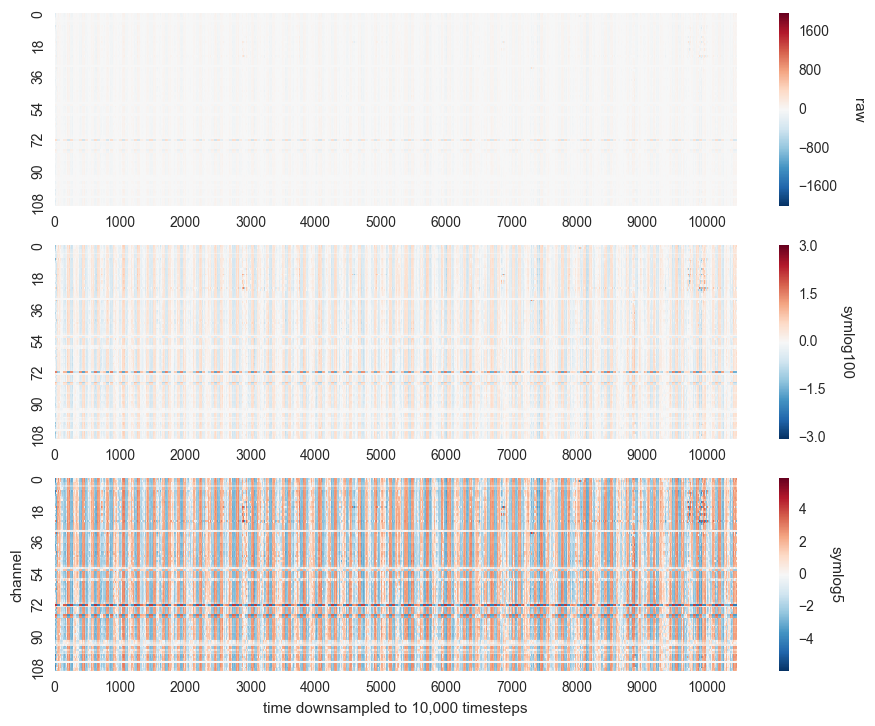

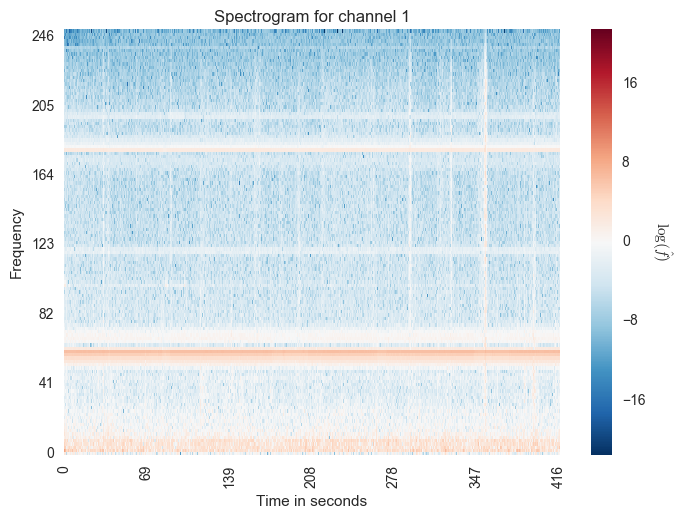

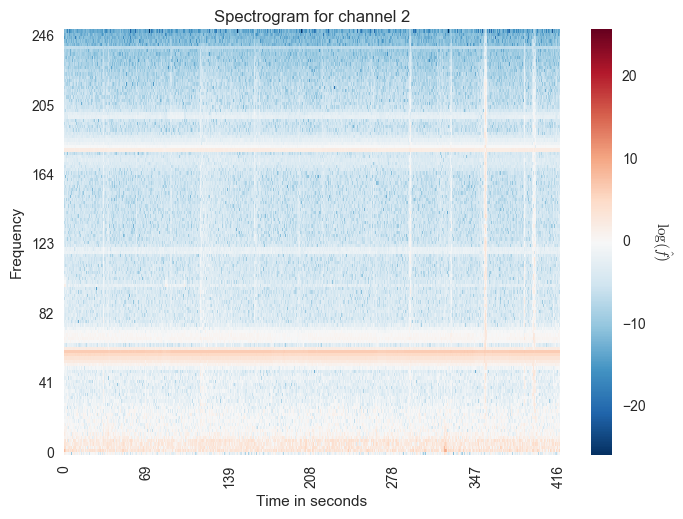

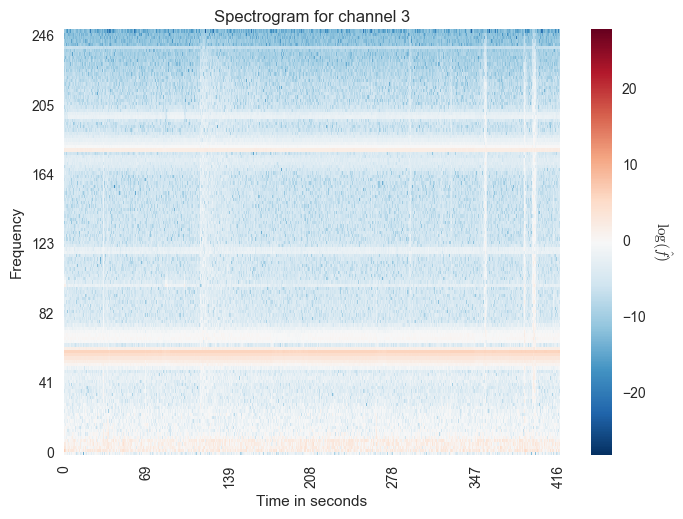

In [3]:
from panda.methods.misc import setup
from panda.methods.denoise import highpass
(D, p_local) = setup(D, {}, p_global)
(D, p_local) = highpass(D, {}, p_global)
viz.heatmap(D, {'eog_in': True}, p_global)
viz.spectrograms(D, {'eog_in': True}, p_global)

The noise here is due to powerline noise, which clusters around 50 - 70 Hz depending on the country that the data was collected in. We remedy this by filtering frequency components at these values, which correspond to the horizontal bands seen in the spectrograms above.

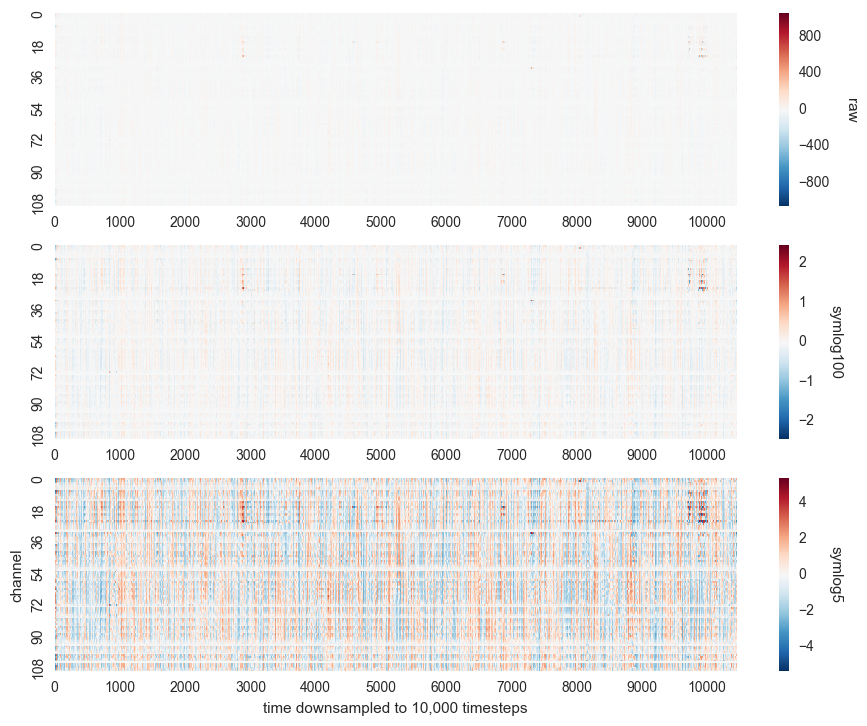

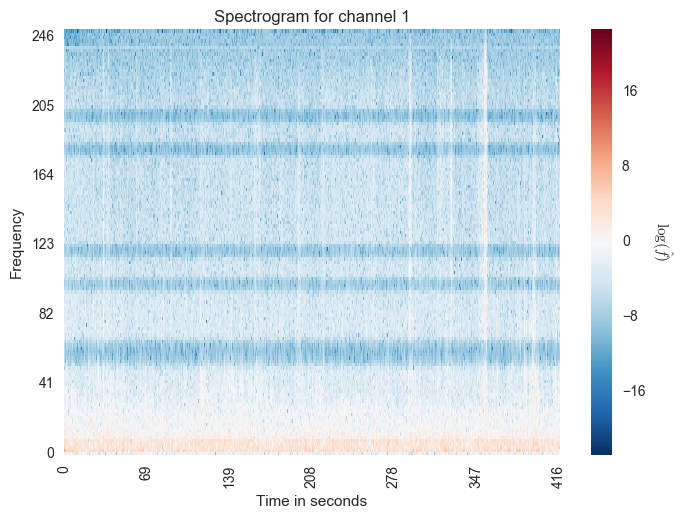

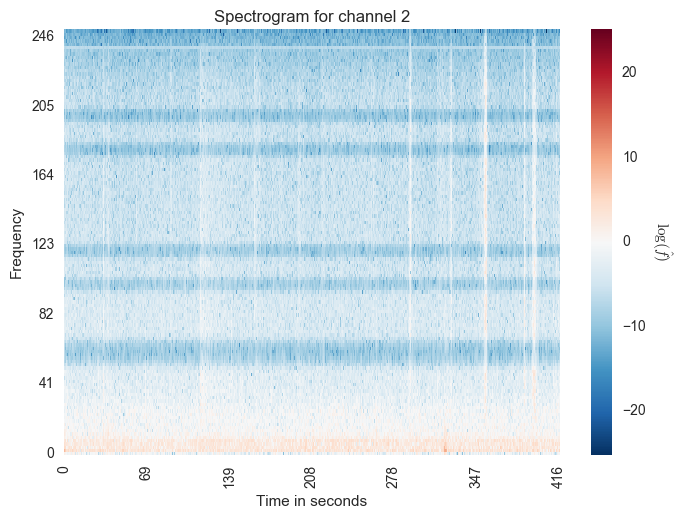

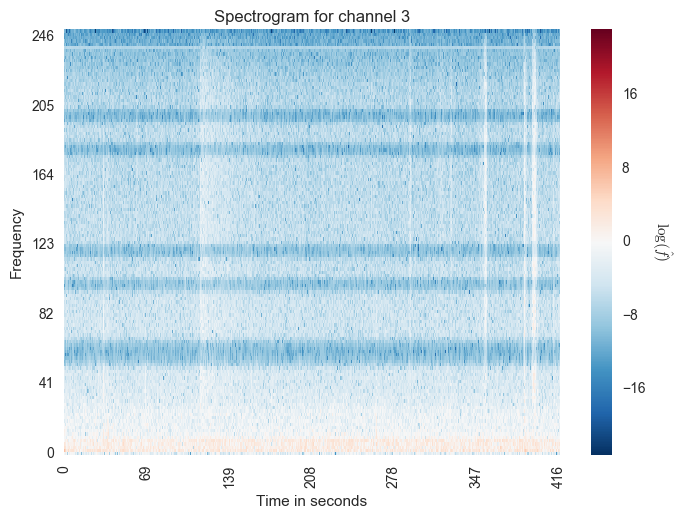

In [4]:
from panda.methods.denoise import bandstop
(D_bs, p_local) = bandstop(D, {}, p_global)
viz.heatmap(D_bs, {'eog_in': True}, p_global)
viz.spectrograms(D_bs, {'eog_in': True}, p_global)

The power line frequency components appear to be gone here.

Now we show the residual of the bandstop filtered data from the mean centered data.

E.g., `D_bs - D_hp`.

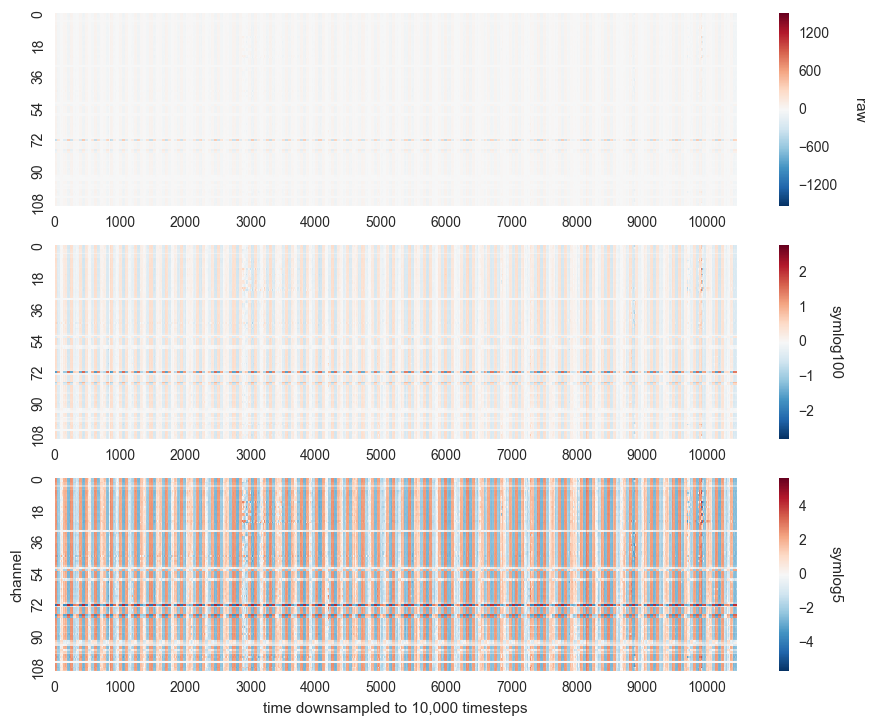

In [5]:
viz.heatmap((D_bs - D), {'eog_in': True}, p_global)